Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights
Objective: Explore the product listing dynamics on Amazon UK to extract actionable business insights. By understanding the distribution, central tendencies, and relationships of various product attributes, businesses can make more informed decisions on product positioning, pricing strategies, and inventory management.

Dataset: This lab utilizes the Amazon UK product dataset which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

Part 1: Understanding Product Categories
Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

Frequency Tables:

Generate a frequency table for the product category.
Which are the top 5 most listed product categories?
Visualizations:

Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?
Part 2: Delving into Product Pricing
Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
data = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [4]:
print(data.shape)
data.nunique()

(2443651, 9)


uid                  2443651
asin                 2222742
title                2077591
stars                     42
reviews                19446
price                  82916
isBestSeller               2
boughtInLastMonth         25
category                 296
dtype: int64

In [5]:
top_50 = data[["category", "uid"]].groupby("category").count()
top_50 = top_50.sort_values(by="uid",ascending=False)
top_50 = top_50.nlargest(50, columns="uid")
top_50 = top_50.reset_index()
top_50

,category,uid
0,Sports & Outdoors,836265
1,Beauty,19312
2,"Handmade Clothing, Shoes & Accessories",19229
3,Bath & Body,19092
4,Birthday Gifts,18978
5,Manicure & Pedicure Products,18940
6,Skin Care,18769
7,Make-up,18756
8,Hair Care,18735
9,Fragrances,18564


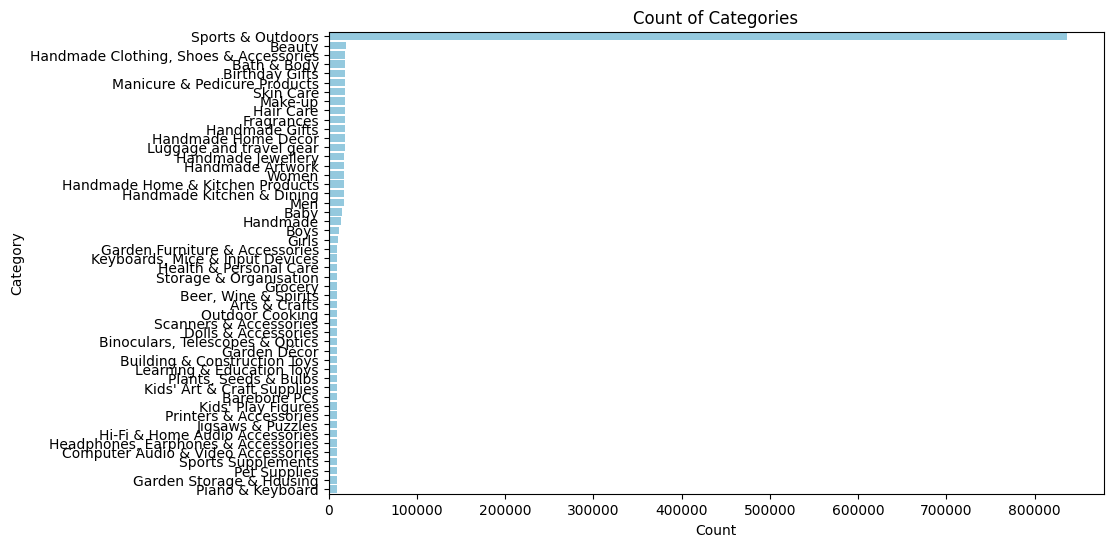

In [6]:
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='uid', y='category', data=top_50, color='skyblue')

# Set the axis labels and title
barplot.set_xlabel('Count')
barplot.set_ylabel('Category')
barplot.set_title('Count of Categories')

plt.show()

In [7]:
top_5 = data[["category", "uid"]].groupby("category").count()
top_5 = top_5.sort_values(by="uid",ascending=False)
top_5 = top_5.nlargest(5, columns="uid")
top_5

,uid
category,
Sports & Outdoors,836265
Beauty,19312
"Handmade Clothing, Shoes & Accessories",19229
Bath & Body,19092
Birthday Gifts,18978


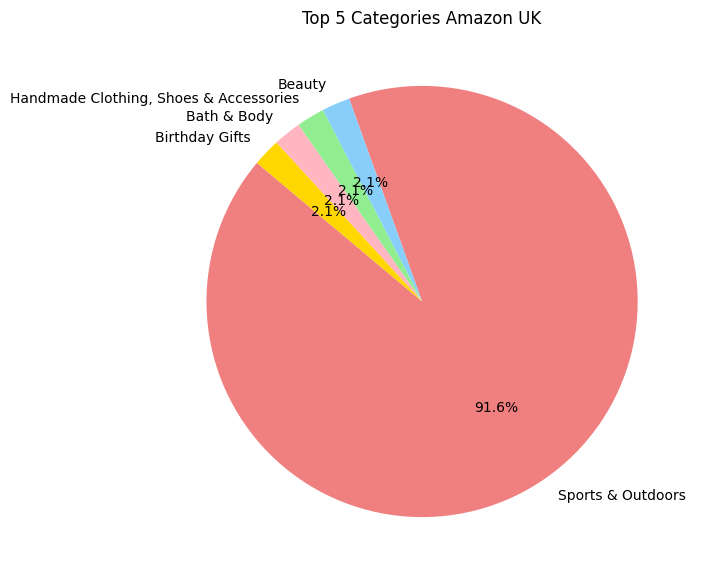

In [8]:
plt.figure(figsize=(7, 7))
plt.pie(x=top_5["uid"], labels=top_5.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue', 'lightgreen', 'lightpink', 'gold'])
plt.title('Top 5 Categories Amazon UK')

plt.show()

In [9]:
top_10_list = [top_50["category"].iloc[i] for i in range(10)]
top_10_list

['Sports & Outdoors',
 'Beauty',
 'Handmade Clothing, Shoes & Accessories',
 'Bath & Body',
 'Birthday Gifts',
 'Manicure & Pedicure Products',
 'Skin Care',
 'Make-up',
 'Hair Care',
 'Fragrances']

In [10]:
data_subset = data[data["category"].isin (top_10_list)]
data_subset = data_subset.reset_index()
data_subset.shape

(1006640, 10)

In [11]:
data_subset["price"].value_counts()

price
12.99      15905
9.99       13586
8.99       10780
7.99       10031
10.99       9751
           ...  
2664.34        1
2505.39        1
3181.20        1
2400.45        1
198.21         1
Name: count, Length: 56178, dtype: int64

In [12]:
data_subset[["category", "price"]].groupby("category").median()

,price
category,
Bath & Body,11.70
Beauty,8.99
Birthday Gifts,14.25
Fragrances,21.99
Hair Care,9.98
"Handmade Clothing, Shoes & Accessories",8.99
Make-up,7.00
Manicure & Pedicure Products,7.50
Skin Care,12.00


In [13]:
pd.crosstab(data_subset['price'], data_subset['category'])

category,Bath & Body,Beauty,Birthday Gifts,Fragrances,Hair Care,"Handmade Clothing, Shoes & Accessories",Make-up,Manicure & Pedicure Products,Skin Care,Sports & Outdoors
price,,,,,,,,,,
0.00,0,0,0,0,0,0,0,0,0,5
0.01,0,0,0,1,0,0,1,1,0,564
0.02,0,0,0,0,0,0,0,0,0,6
0.03,0,0,0,0,0,0,0,0,0,2
0.04,0,0,0,0,0,0,0,0,0,12
...,...,...,...,...,...,...,...,...,...,...
19999.00,0,0,0,0,0,0,0,0,0,4
20015.45,0,0,0,0,0,0,0,0,0,1
20489.75,0,0,0,0,0,0,0,0,0,1


C:\Users\juanf\AppData\Local\Temp\ipykernel_29400\1216222937.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=90)


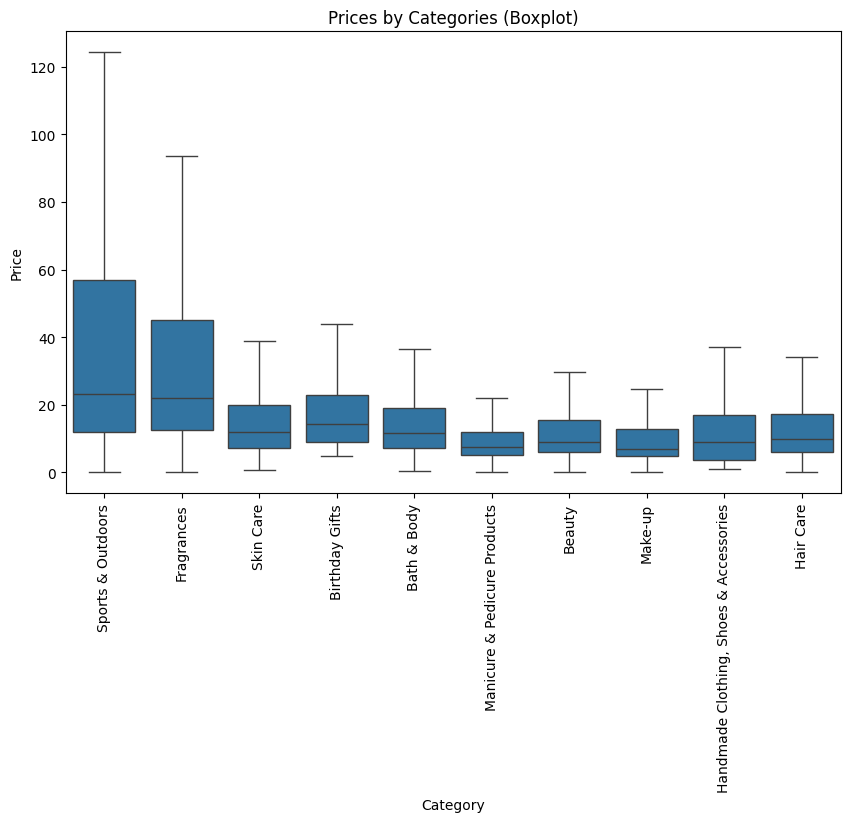

In [14]:
plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(x='category', y='price', data=data_subset, showfliers=False )

# Customize the appearance
plt.title('Prices by Categories (Boxplot)')
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=90)
plt.xlabel('Category')
plt.ylabel('Price')

plt.show()


Measures of Centrality:

Calculate the mean, median, and mode for the price of products.
What's the average price point of products listed? How does this compare with the most common price point (mode)?


In [15]:
result_table = data_subset.groupby('category').agg({
    'uid':['count'],
    'price': ['mean', 'median', 'min', 'max', 'var', 'std',
              lambda x: x.quantile(0.25),  # 25th percentile
              lambda x: x.quantile(0.75)   # 75th percentile
              ],
    }).round(1)

result_table.columns = ['Count', 'p_mean', 'p_median', 'p_min', 'p_max', 'p_var', 'p_std', 'p_25', 'p_75']

result_table["interq_range"] = result_table['p_75']-result_table['p_25']

result_table

,Count,p_mean,p_median,p_min,p_max,p_var,p_std,p_25,p_75,interq_range
category,,,,,,,,,,
Bath & Body,19092,15.0,11.7,0.4,590.7,206.2,14.4,7.2,19.0,11.8
Beauty,19312,13.2,9.0,0.3,1199.0,313.1,17.7,5.9,15.5,9.6
Birthday Gifts,18978,26.6,14.2,5.0,1900.0,3690.4,60.7,9.0,23.0,14.0
Fragrances,18564,36.2,22.0,0.0,5999.0,3442.2,58.7,12.4,45.0,32.6
Hair Care,18735,14.3,10.0,0.3,550.0,284.1,16.9,6.0,17.3,11.3
"Handmade Clothing, Shoes & Accessories",19229,16.9,9.0,1.0,900.0,1081.7,32.9,3.6,17.0,13.4
Make-up,18756,10.9,7.0,0.0,249.0,132.9,11.5,5.0,12.9,7.9
Manicure & Pedicure Products,18940,10.5,7.5,0.0,659.0,138.2,11.8,5.3,12.0,6.7
Skin Care,18769,16.3,12.0,0.8,719.0,297.8,17.3,7.3,20.0,12.7


In [16]:
# Assuming 'data' is your DataFrame and 'value' is the column where you want to identify and drop outliers
# Replace 'value' with the actual column name from your dataset

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data_subset['price'].quantile(0.25)
Q3 = data_subset['price'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a subset of data by dropping the outliers based on the IQR range
data_subset_clean = data_subset[(data_subset['price'] > lower_bound) & (data_subset['price'] < upper_bound)]


In [19]:
print(data_subset.shape)
print(data_subset_clean.shape)

(1006640, 10)
(863448, 10)


In [17]:
result_table = data_subset_clean.groupby('category').agg({
    'uid':['count'],
    'price': ['mean', 'median', 'min', 'max', 'var', 'std',
              lambda x: x.quantile(0.25),  # 25th percentile
              lambda x: x.quantile(0.75)   # 75th percentile
              ],
    }).round(1)

result_table.columns = ['Count', 'p_mean', 'p_median', 'p_min', 'p_max', 'p_var', 'p_std', 'p_25', 'p_75']

result_table["interq_range"] = result_table['p_75']-result_table['p_25']

result_table

,Count,p_mean,p_median,p_min,p_max,p_var,p_std,p_25,p_75,interq_range
category,,,,,,,,,,
Bath & Body,19051,14.7,11.6,0.4,100.0,123.9,11.1,7.2,19.0,11.8
Beauty,19235,12.5,9.0,0.3,100.0,125.1,11.2,5.9,15.2,9.3
Birthday Gifts,18405,18.6,14.0,5.0,101.5,235.3,15.3,9.0,22.0,13.0
Fragrances,17480,28.7,20.0,0.0,101.7,543.1,23.3,12.0,39.0,27.0
Hair Care,18628,13.5,10.0,0.3,100.0,133.0,11.5,6.0,17.0,11.0
"Handmade Clothing, Shoes & Accessories",18821,13.0,9.0,1.0,101.0,204.0,14.3,3.6,16.0,12.4
Make-up,18718,10.6,7.0,0.0,100.0,90.8,9.5,5.0,12.8,7.8
Manicure & Pedicure Products,18906,10.2,7.5,0.0,100.4,79.4,8.9,5.2,12.0,6.8
Skin Care,18689,15.7,12.0,0.8,101.0,158.2,12.6,7.2,20.0,12.8


Measures of Dispersion:
Determine the variance, standard deviation, range, and interquartile range for product price.
How varied are the product prices? Are there any indicators of a significant spread in prices?
Visualizations:

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.
Part 3: Unpacking Product Ratings
Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?


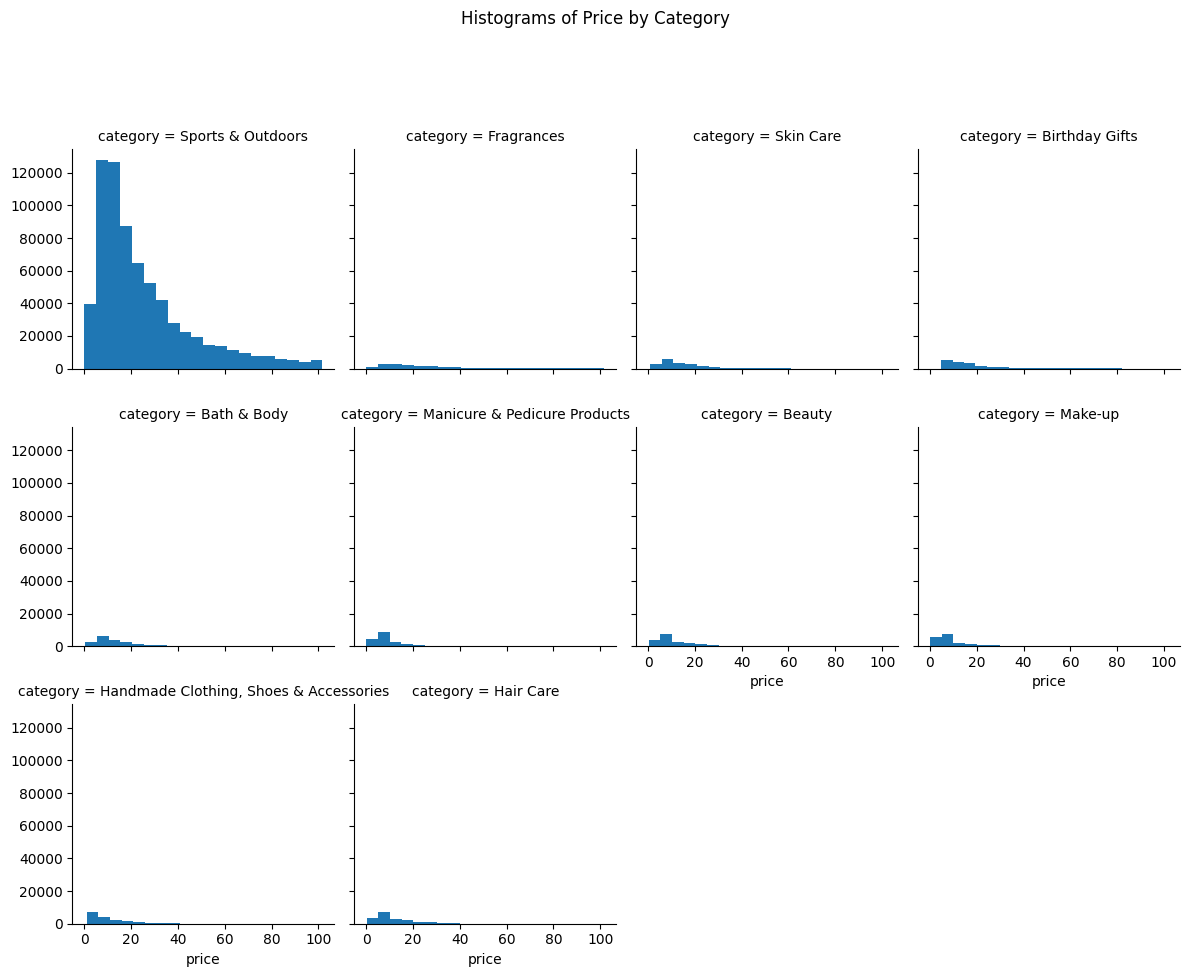

In [21]:
g = sns.FacetGrid(data_subset_clean, col='category', col_wrap=4)
g.map(plt.hist, 'price', bins=20)

# Set the main title
g.fig.suptitle("Histograms of Price by Category", y=1.08)

# Adjust the layout
plt.tight_layout()

plt.show()

<Axes: >

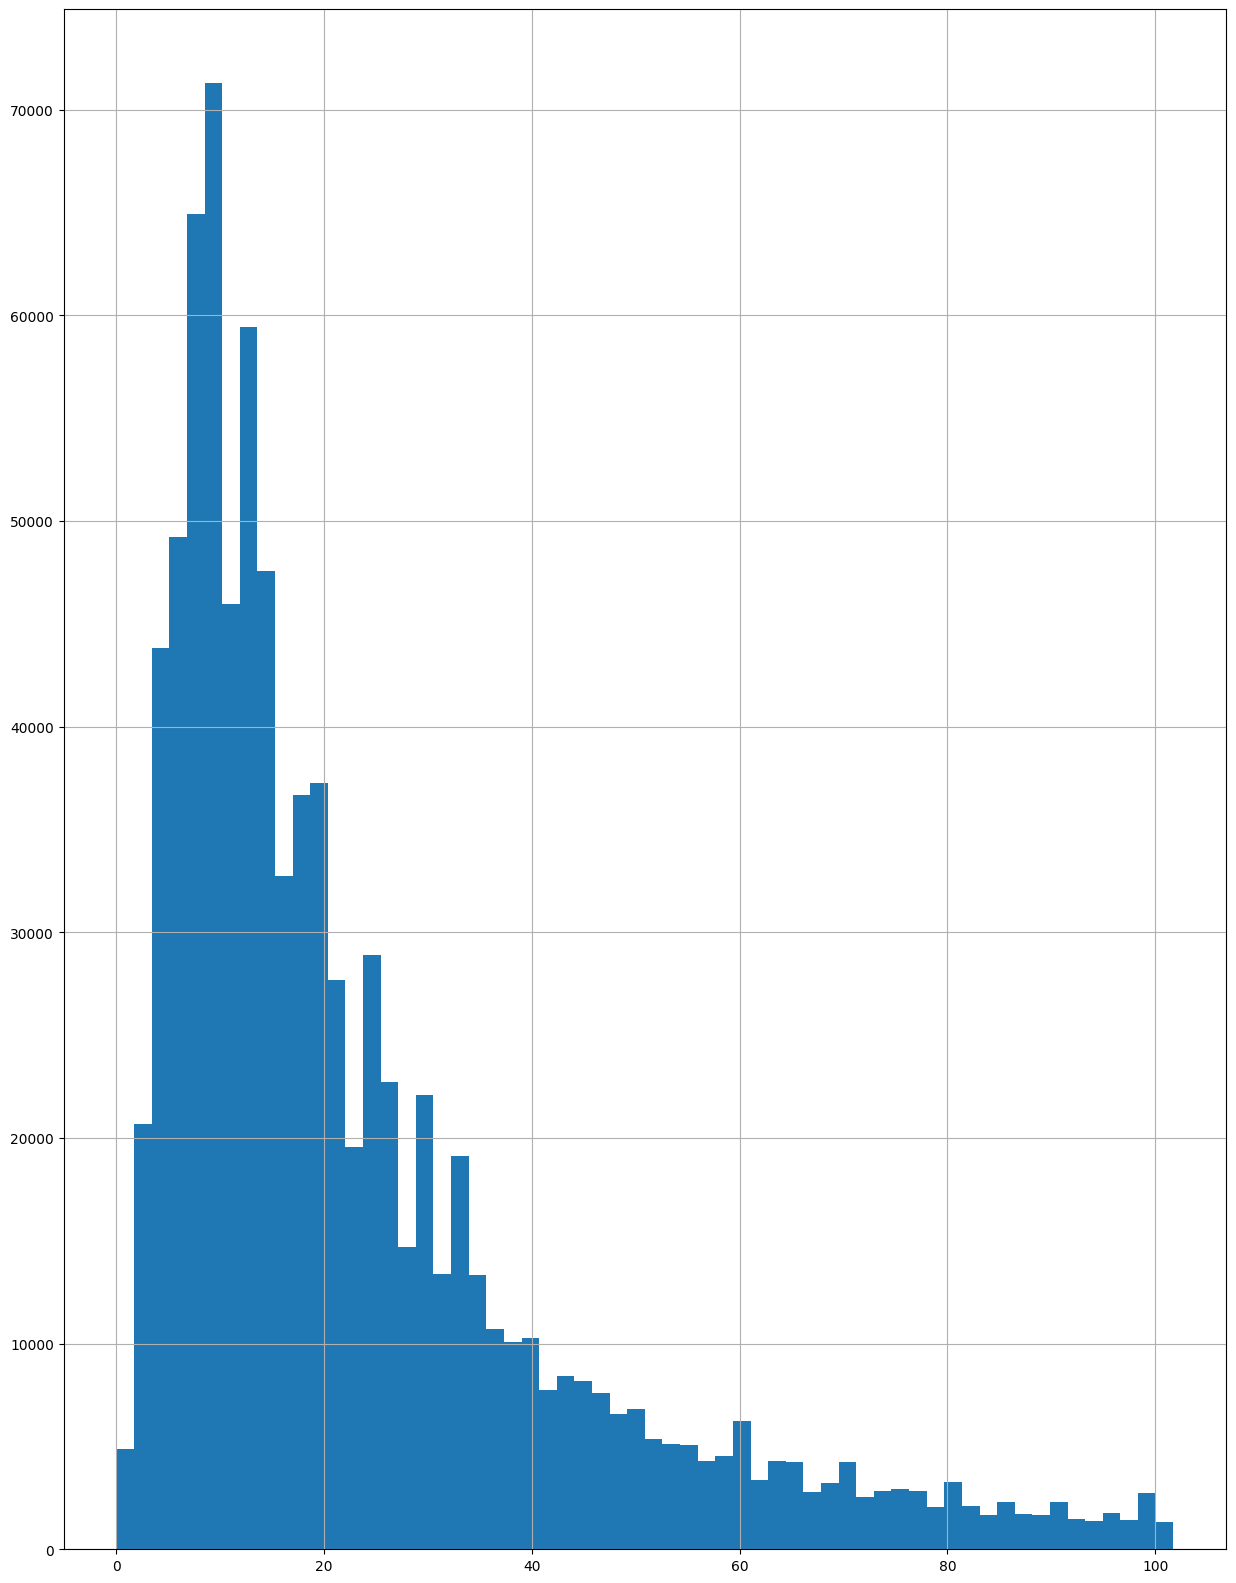

In [23]:
data_subset_clean["price"].hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10)

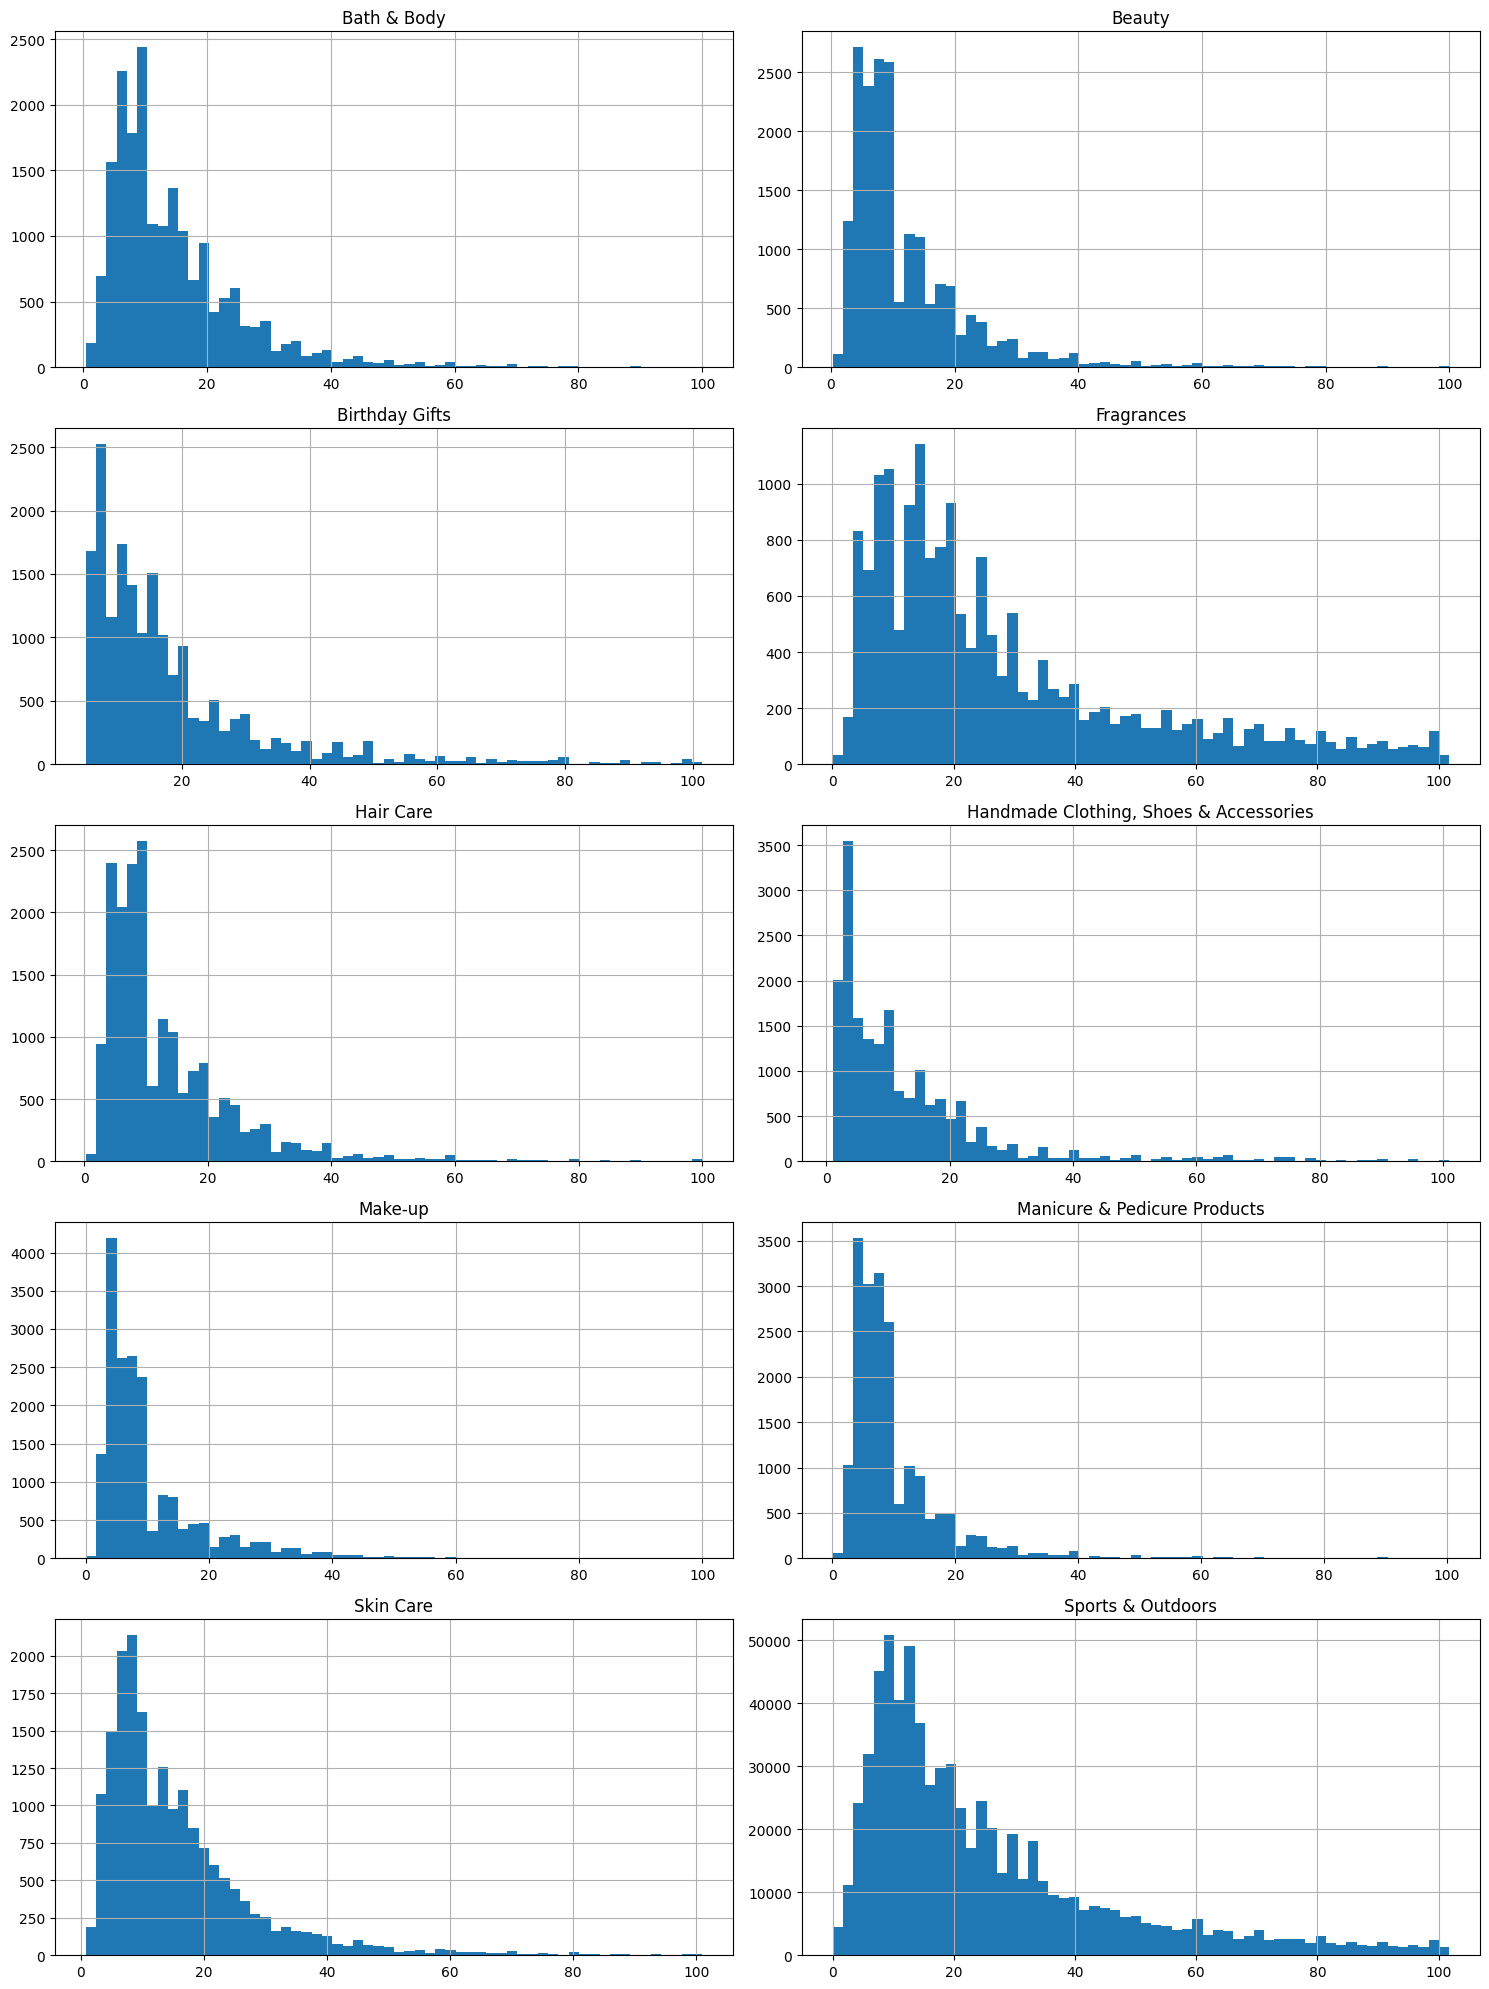

In [24]:
# Initialize the subplot
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))

# Plot a histogram for 'price' for each product category
for (category, group), ax in zip(data_subset_clean.groupby('category'), axes.flatten()):
    group['price'].hist(ax=ax, bins=60)
    ax.set_title(category)

# Adjust the layout
plt.tight_layout()
plt.show()


Measures of Centrality:

Calculate the mean, median, and mode for the rating of products.
How do customers generally rate products? Is there a common trend?
Measures of Dispersion:


In [28]:
data_subset_clean.nunique()

index                863448
uid                  863448
asin                 839516
title                758629
stars                    42
reviews                9279
price                 10165
isBestSeller              2
boughtInLastMonth        23
category                 10
dtype: int64

In [29]:
data_subset_clean["stars"].value_counts()

stars
0.0    603167
5.0     35533
4.5     29830
4.4     27103
4.6     24950
4.3     22968
4.2     18658
4.7     16600
4.0     16296
4.1     13941
3.9      8042
4.8      7212
3.8      6151
3.7      4836
3.6      3879
3.0      3875
3.5      3586
1.0      2542
3.4      2473
3.3      2057
4.9      1896
3.2      1444
2.0      1236
3.1      1204
2.9       795
2.8       593
2.5       542
2.7       522
2.6       382
2.4       280
2.3       172
2.2       154
2.1       137
1.5       113
1.9        65
1.8        60
1.4        51
1.7        46
1.6        33
1.3        19
1.2         4
1.1         1
Name: count, dtype: int64

In [31]:
result_table = data_subset_clean.groupby('category').agg({
    'uid':['count'],
    'stars': ['mean', 'median', 'min', 'max', 'var', 'std',
              lambda x: x.quantile(0.25),  # 25th percentile
              lambda x: x.quantile(0.75)   # 75th percentile
              ],
    }).round(1)

result_table.columns = ['Count', 'p_mean', 'p_median', 'p_min', 'p_max', 'p_var', 'p_std', 'p_25', 'p_75']

result_table["interq_range"] = result_table['p_75']-result_table['p_25']

result_table

,Count,p_mean,p_median,p_min,p_max,p_var,p_std,p_25,p_75,interq_range
category,,,,,,,,,,
Bath & Body,19051,4.0,4.4,0.0,5.0,1.7,1.3,4.1,4.6,0.5
Beauty,19235,4.3,4.4,0.0,5.0,0.3,0.5,4.2,4.6,0.4
Birthday Gifts,18405,2.0,0.0,0.0,5.0,5.3,2.3,0.0,4.7,4.7
Fragrances,17480,3.6,4.3,0.0,5.0,2.7,1.6,3.7,4.6,0.9
Hair Care,18628,4.1,4.4,0.0,5.0,0.8,0.9,4.1,4.5,0.4
"Handmade Clothing, Shoes & Accessories",18821,1.1,0.0,0.0,5.0,3.8,2.0,0.0,0.0,0.0
Make-up,18718,3.8,4.2,0.0,5.0,1.6,1.3,3.8,4.4,0.6
Manicure & Pedicure Products,18906,3.7,4.2,0.0,5.0,2.0,1.4,3.8,4.5,0.7
Skin Care,18689,4.1,4.4,0.0,5.0,1.0,1.0,4.1,4.6,0.5



Determine the variance, standard deviation, and interquartile range for product rating.
Are the ratings consistent, or is there a wide variation in customer feedback?
Shape of the Distribution:

Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?
Visualizations:

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?
Submission: Submit a Jupyter Notebook which contains code and a business-centric report summarizing your findings.



<Axes: >

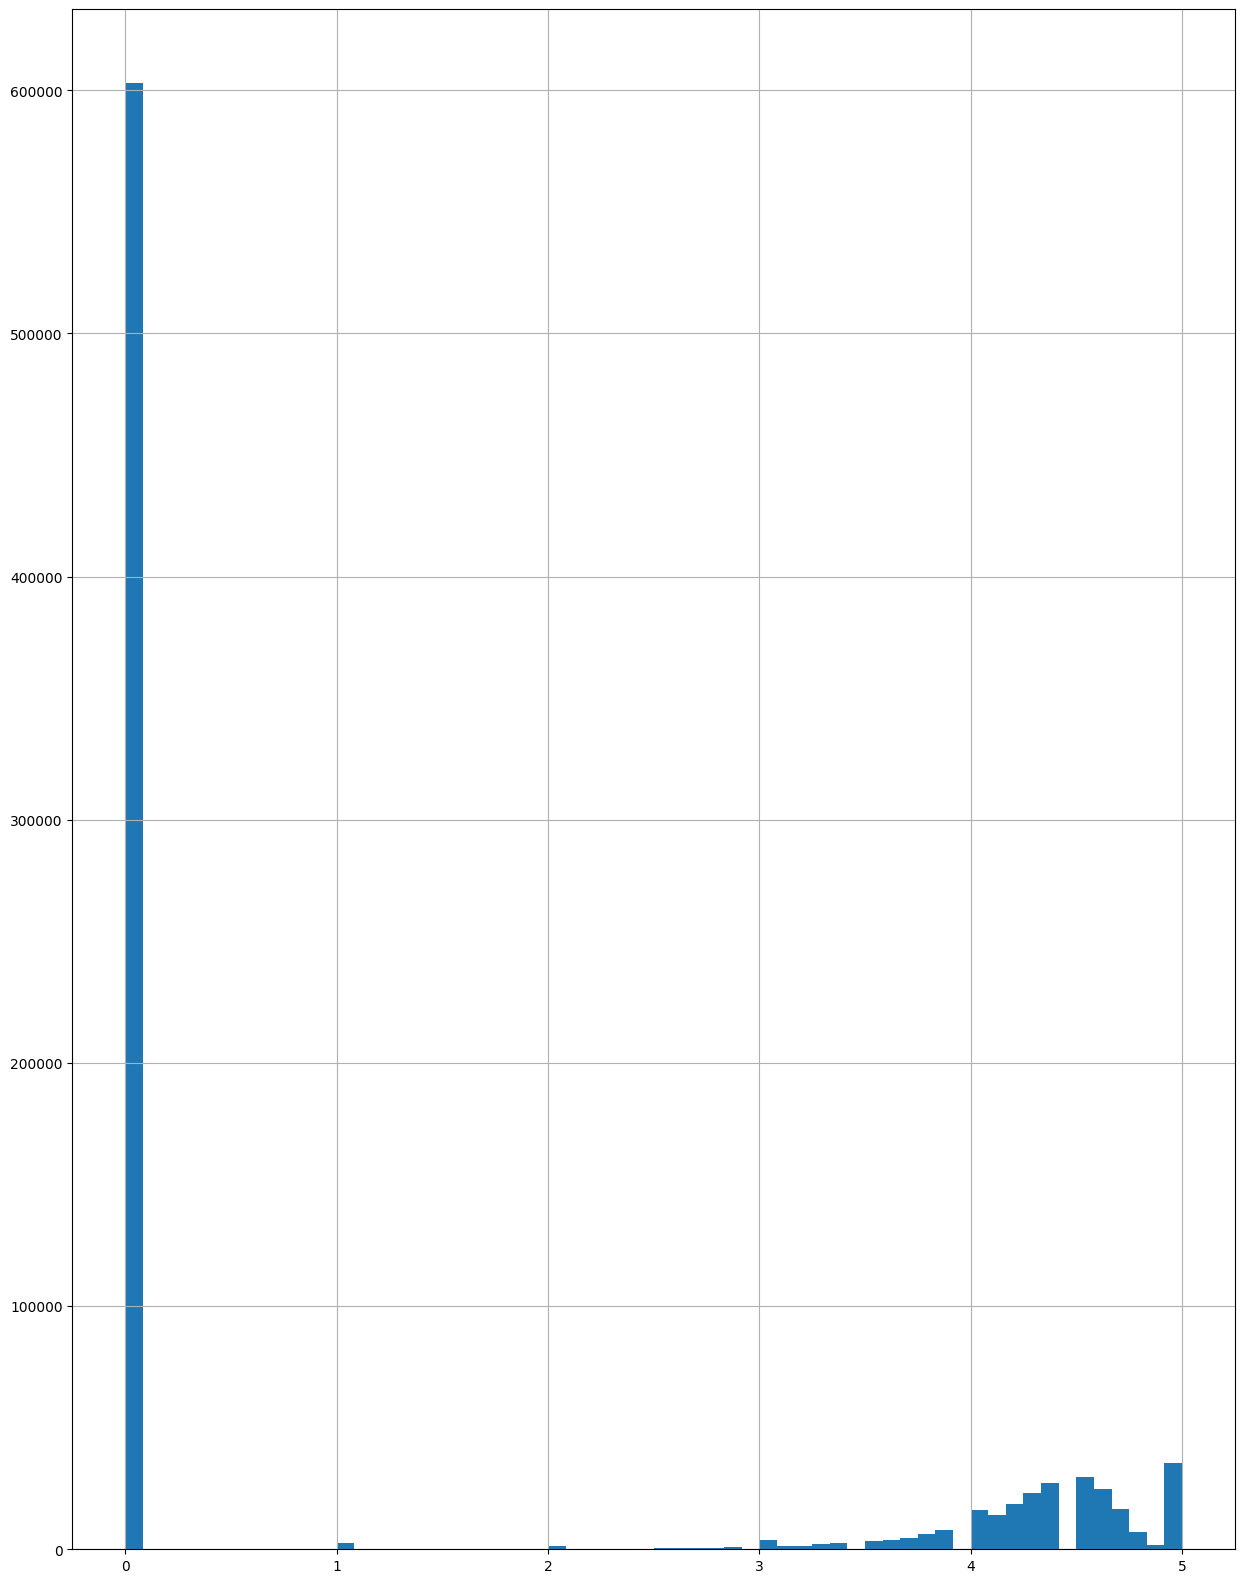

In [32]:
data_subset_clean["stars"].hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10)